In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [ ]:
X_train = pd.read_csv("gisette_train.data",sep=' ',header=None)
y_train = pd.read_csv("gisette_train.labels",sep=' ',header=None)
X_train.dropna(axis=1,how='all',inplace=True)
X_test = pd.read_csv("gisette_valid.data",sep=' ',header=None)
y_test = pd.read_csv("gisette_valid.labels",sep=' ',header=None)
X_test.dropna(axis=1,how='all',inplace=True)
X_test

In [ ]:
ss=StandardScaler()
ss.fit(X_train)
tf_X_train=ss.transform(X_train)
tf_X_test=ss.transform(X_test)

In [ ]:
k=list(range(1,301))
result=[]
for i in k:
      clf=SGDClassifier(max_iter=i,loss='log',learning_rate='constant',eta0=0.01,alpha=0.0001)
      clf.fit(tf_X_train, y_train)
      y_pred = clf.predict(tf_X_test)
      y_pred=np.reshape(y_pred,(-1,1))
      result.append(log_loss(y_pred, y_test))


In [ ]:
clf = SGDClassifier(loss='log',max_iter=300,learning_rate='constant',eta0=0.01,alpha=0.0001)

In [ ]:
clf.fit(tf_X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=300,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict(tf_X_test)




In [ ]:
y_pred=np.reshape(y_pred,(-1,1))


In [ ]:
y_test.shape

(1000, 1)

In [ ]:
y_pred.shape

(1000, 1)

In [ ]:
log_loss(y_pred,y_test)

0.9325589566240421

Text(0.5, 1.0, 'oombu')

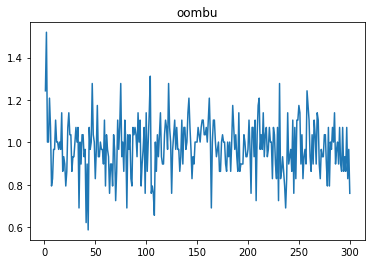

In [ ]:
plt.plot(k,result)
plt.title('oombu')